# Lecture 19 – Causation

**by Will Fithian**

In [124]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Generate Four Loko data
np.random.seed(1)
n = 300
age = np.round(np.random.uniform(20,80,size=n)).astype(int)
four_loko = 1*(np.random.uniform(size=n) < 1/(1+np.exp(-((40-age)/10))))
baseline_systolic_bp = np.round(110 + age / 4 + 4 * np.random.normal(size=n)).astype(int)
systolic_bp = baseline_systolic_bp + 3 * four_loko
blood_pressure = pd.DataFrame({"Age": age, "Loko Drinker": four_loko, "Systolic BP": systolic_bp})

blood_pressure_counterfactual = pd.DataFrame({"Age": age, "Loko Drinker": four_loko, "Systolic BP(0)": baseline_systolic_bp,
                                              "Systolic BP(1)": baseline_systolic_bp + 3, "Systolic BP": systolic_bp})



baseline_chol = 0+ 4/(1+np.exp(((20-age)/10))) - age/100 + .02*np.random.normal(size=n)
chol = pd.DataFrame({"Age": age, "Loko Drinker": four_loko, "LDL Cholesterol": baseline_chol + .1 * four_loko})


## Does drinking Four Loko reduce blood pressure?

In [57]:
blood_pressure

,Age,Loko Drinker,Systolic BP
0,45,0,125
1,63,0,128
2,20,1,118
3,38,0,119
4,29,1,122
...,...,...,...
295,24,1,116
296,43,1,124
297,25,1,118
298,79,0,136


New study shows that Four Loko drinkers have lower blood pressure!

In [58]:
blood_pressure[["Loko Drinker", "Systolic BP"]].groupby("Loko Drinker").aggregate(np.mean)

,Systolic BP
Loko Drinker,
0,124.589109
1,121.724490


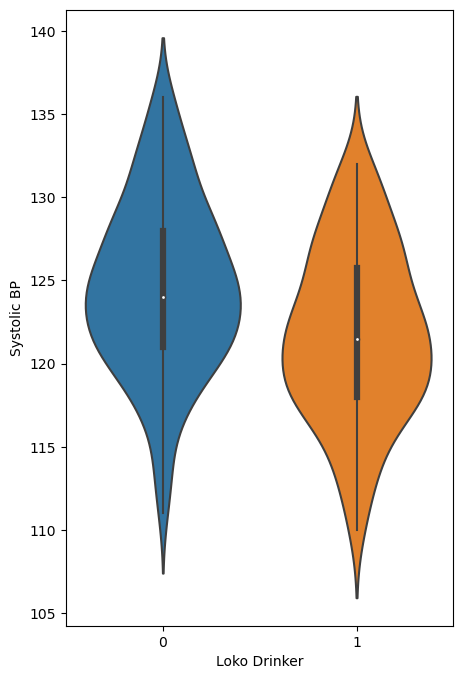

In [59]:
plt.figure(figsize=(5, 8))
sns.violinplot(data=blood_pressure, x = 'Loko Drinker', y = 'Systolic BP');

Let's take a closer look at the data

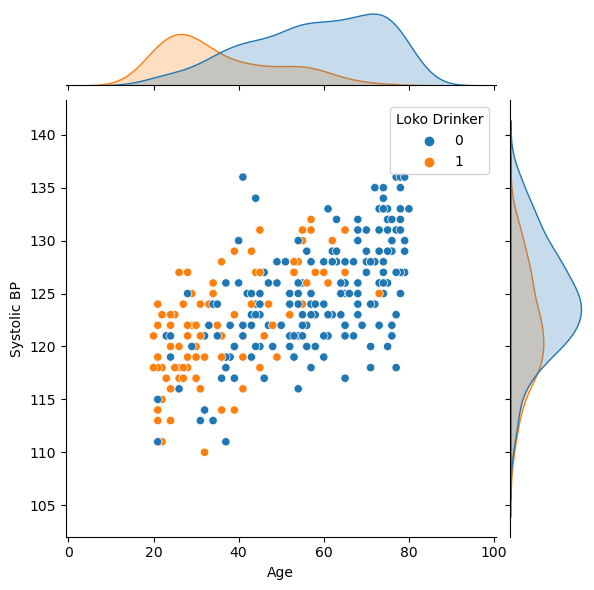

In [60]:
sns.jointplot(data = blood_pressure, x = 'Age', y = 'Systolic BP', hue='Loko Drinker');

What happened here?

In [125]:
blood_pressure_counterfactual

,Age,Loko Drinker,Systolic BP(0),Systolic BP(1),Systolic BP
0,45,0,125,128,125
1,63,0,128,131,128
2,20,1,115,118,118
3,38,0,119,122,119
4,29,1,119,122,122
...,...,...,...,...,...
295,24,1,113,116,116
296,43,1,121,124,124
297,25,1,115,118,118
298,79,0,136,139,136


What if we fit a model for both groups?

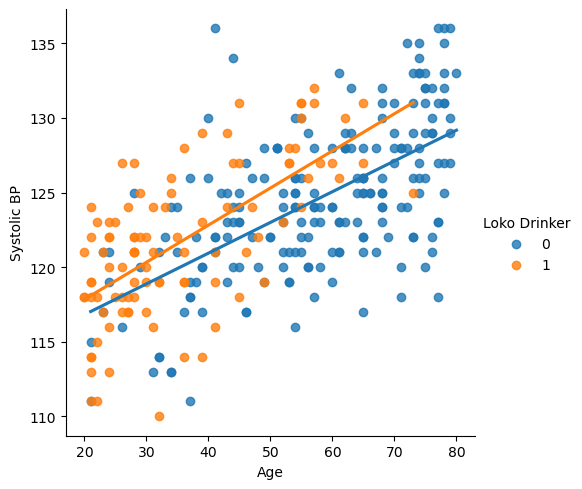

In [123]:
sns.lmplot(data = blood_pressure, x = 'Age', y = 'Systolic BP', hue='Loko Drinker', ci=False);

Covariate adjustment works for this problem:

In [122]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(blood_pressure[["Age", "Loko Drinker"]], blood_pressure[["Systolic BP"]])
model.coef_

array([[0.21756328, 1.9468967 ]])

Covariate adjustment requires that we get the functional form right!

In [118]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(chol[["Age", "Loko Drinker"]], chol[["LDL Cholesterol"]])
model.coef_

array([[ 0.01730816, -0.01773236]])

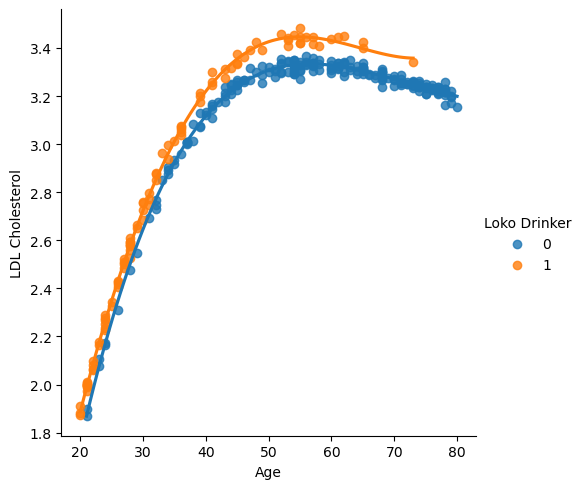

In [119]:
sns.lmplot(data = chol, x = 'Age', y = 'LDL Cholesterol', hue = 'Loko Drinker', order = 4, ci=False);